# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observable Trends 
1. As expected, cities around the equator (latitude 0) have higher temperatures than those farther away. 
2. There is a strong negative correlation in the Northern Hemisphere between max temperature and latitude. There is a strong positive correlation in the Southern Hemisphere between max temperature and latitude.
3. There is very little / no correlation between wind speed/latitude, cloudiness/latitude and humidity/latitude in both the Northern and Southern Hemispheres.

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [24]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
# Set counters for print statements 
counter = 0
set_counter = 1

# Set query url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

In [26]:
# Create a list to hold variables 
city_name = []
city_cloudiness = []
country_name = []
dates = []
city_humidity = []
city_lat = []
city_lon = []
city_max_temp = []
city_windspeed = []

# Print before the start of the loop

print('Beginning Data Retrieval')
print('----------------------------')
# Create loop that loops through the cities for the dataframe
for city in cities:
    try: 
        response = requests.get(f'{query_url} + {city}').json()
        city_cloudiness.append(response['clouds']['all'])
        country_name.append(response['sys']['country'])
        dates.append(response['dt'])
        city_humidity.append(response['main']['humidity'])
        city_lat.append(response['coord']['lat'])
        city_lon.append(response['coord']['lon'])
        city_max_temp.append(response['main']['temp_max'])
        city_windspeed.append(response['wind']['speed'])
        
# Use the counters for Record and Set (1 Set = 50 records)
        if counter <= 49:
            counter +=1
            city_name.append(city)
        else:
            counter = 1
            set_counter +=1
            city_name.append(city)
        print(f'Processing Record {counter} of Set {set_counter}) | {city}')

# Add an exception to the loop in case the city is not found
    except: 
        print(f'City not found...Skipping........')
    continue

# Print at the end of the loop
print(f'------------------------')
print(f'Data Retrieval Complete')
print(f'------------------------')

Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1) | pianco
Processing Record 2 of Set 1) | tonantins
Processing Record 3 of Set 1) | swellendam
Processing Record 4 of Set 1) | castro
Processing Record 5 of Set 1) | zhuanghe
Processing Record 6 of Set 1) | narsaq
Processing Record 7 of Set 1) | kapoeta
Processing Record 8 of Set 1) | vaini
Processing Record 9 of Set 1) | jamestown
Processing Record 10 of Set 1) | erzin
Processing Record 11 of Set 1) | punta arenas
Processing Record 12 of Set 1) | new norfolk
Processing Record 13 of Set 1) | adrar
Processing Record 14 of Set 1) | lake station
Processing Record 15 of Set 1) | acari
Processing Record 16 of Set 1) | avarua
Processing Record 17 of Set 1) | paamiut
Processing Record 18 of Set 1) | kruisfontein
Processing Record 19 of Set 1) | ushuaia
Processing Record 20 of Set 1) | chokurdakh
Processing Record 21 of Set 1) | rikitea
Processing Record 22 of Set 1) | tuktoyaktuk
Processing Record 23 of Set 1) 

Processing Record 29 of Set 4) | meadow lake
Processing Record 30 of Set 4) | lompoc
Processing Record 31 of Set 4) | cabo san lucas
Processing Record 32 of Set 4) | baruun-urt
Processing Record 33 of Set 4) | santarem
Processing Record 34 of Set 4) | nha trang
Processing Record 35 of Set 4) | swan hill
Processing Record 36 of Set 4) | tabas
Processing Record 37 of Set 4) | varhaug
City not found...Skipping........
Processing Record 38 of Set 4) | yuci
Processing Record 39 of Set 4) | bandarbeyla
Processing Record 40 of Set 4) | huangyan
Processing Record 41 of Set 4) | finschhafen
Processing Record 42 of Set 4) | esperance
Processing Record 43 of Set 4) | thai binh
Processing Record 44 of Set 4) | kikwit
Processing Record 45 of Set 4) | mutare
Processing Record 46 of Set 4) | touros
Processing Record 47 of Set 4) | deputatskiy
City not found...Skipping........
Processing Record 48 of Set 4) | rocha
Processing Record 49 of Set 4) | belmopan
City not found...Skipping........
Processing 

Processing Record 46 of Set 7) | saint-joseph
Processing Record 47 of Set 7) | bhainsdehi
Processing Record 48 of Set 7) | tezu
Processing Record 49 of Set 7) | chincha alta
City not found...Skipping........
Processing Record 50 of Set 7) | zhaotong
Processing Record 1 of Set 8) | yeniseysk
Processing Record 2 of Set 8) | kongolo
City not found...Skipping........
Processing Record 3 of Set 8) | abrau-dyurso
Processing Record 4 of Set 8) | zamora
Processing Record 5 of Set 8) | upernavik
City not found...Skipping........
City not found...Skipping........
City not found...Skipping........
Processing Record 6 of Set 8) | corsicana
Processing Record 7 of Set 8) | faanui
Processing Record 8 of Set 8) | okhotsk
Processing Record 9 of Set 8) | hamilton
Processing Record 10 of Set 8) | qasigiannguit
Processing Record 11 of Set 8) | mashhad
Processing Record 12 of Set 8) | kasempa
Processing Record 13 of Set 8) | santa isabel do rio negro
Processing Record 14 of Set 8) | energetik
Processing Re

Processing Record 17 of Set 11) | beaver falls
Processing Record 18 of Set 11) | aksu
Processing Record 19 of Set 11) | unai
Processing Record 20 of Set 11) | hofn
------------------------
Data Retrieval Complete
------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
# Create a dataframe with lists data
weather_df = pd.DataFrame({'City':city_name,
                          'Lat':city_lat,
                          'Lng':city_lon,
                          'Max Temp':city_max_temp,
                          'Humidity':city_humidity,
                          'Cloudiness':city_cloudiness,
                          'Wind Speed':city_windspeed,
                          'Country':country_name,
                          'Date':dates})

# Export weather dataframe into a .csv
weather_df.to_csv(output_data_file)

weather_df.count()


City          520
Lat           520
Lng           520
Max Temp      520
Humidity      520
Cloudiness    520
Wind Speed    520
Country       520
Date          520
dtype: int64

In [28]:
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pianco,-7.20,-37.93,68.92,78,1,8.61,BR,1592975648
1,tonantins,-2.87,-67.80,72.43,97,72,1.25,BR,1592975648
2,swellendam,-34.02,20.44,37.40,93,0,2.17,ZA,1592975648
3,castro,-24.79,-50.01,52.99,92,0,4.41,BR,1592975445
4,zhuanghe,39.70,122.99,65.21,90,100,19.82,CN,1592975648
...,...,...,...,...,...,...,...,...,...
515,porto nacional,-10.71,-48.42,73.40,83,65,1.77,BR,1592975682
516,beaver falls,40.75,-80.32,62.01,82,1,5.82,US,1592975682
517,aksu,41.12,80.26,89.89,15,79,9.22,CN,1592975343
518,unai,-16.36,-46.91,63.25,75,5,2.01,BR,1592975682


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [29]:
# Check if humidity max is > 100%
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,5.200000e+02
mean,19.446327,14.033231,69.062308,68.569231,47.711538,7.570288,1.592976e+09
std,33.361041,90.565475,14.506754,22.297753,38.459766,5.087288,1.181540e+02
min,-54.800000,-175.200000,28.400000,8.000000,0.000000,0.720000,1.592975e+09
25%,-8.250000,-65.995000,60.800000,56.000000,2.000000,3.610000,1.592975e+09
50%,22.740000,17.540000,70.080000,74.500000,40.000000,6.420000,1.592976e+09
75%,47.755000,92.595000,80.305000,85.250000,90.000000,10.290000,1.592976e+09
max,78.220000,179.320000,109.940000,100.000000,100.000000,27.220000,1.592976e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

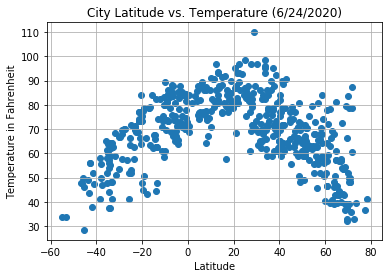

In [30]:
# Generate scatter plot
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker = "o")
plt.grid(True)

# Create labels 
plt.title('City Latitude vs. Temperature (6/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Temperature in Fahrenheit')

# Save plot as .png
plt.savefig("output_data/lat_temp.png")

plt.show()


## Latitude vs. Humidity Plot

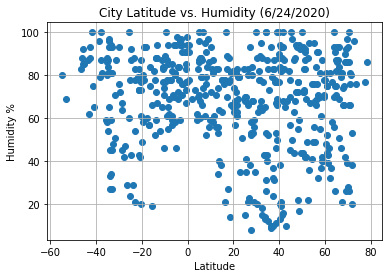

In [31]:
# Generate scatter plot
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker ='o')
plt.grid(True)

# Create labels
plt.title('City Latitude vs. Humidity (6/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')

# Save plot as .png
plt.savefig("output_data/lat_humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

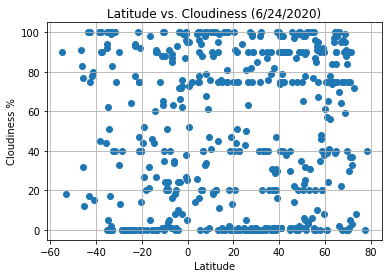

In [32]:
# Generate scatter plot 
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker = 'o')
plt.grid(True)

# Create labels
plt.title('Latitude vs. Cloudiness (6/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')

# Save plot as .png
plt.savefig("output_data/lat_cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

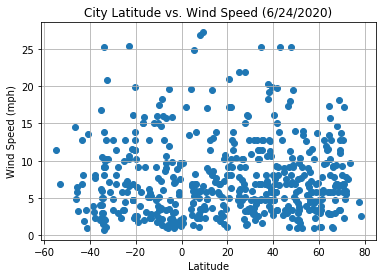

In [33]:
# Generate scatter plot
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker = 'o')
plt.grid(True)

# Create labels
plt.title('City Latitude vs. Wind Speed (6/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Save plot as .png
plt.savefig("output_data/lat_windspeed.png")

plt.show()

## Linear Regression

In [34]:
# Create Northern and Southern Hemisphere dataframes
northern_df = weather_df.loc[weather_df['Lat']>=0]
southern_df = weather_df.loc[weather_df['Lat']<0]

In [35]:
# Display dataframe to see if we have the correct data 
northern_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,zhuanghe,39.70,122.99,65.21,90,100,19.82,CN,1592975648
5,narsaq,60.92,-46.05,46.40,75,57,1.12,GL,1592975445
6,kapoeta,4.77,33.59,75.94,71,16,2.77,SS,1592975648
8,jamestown,42.10,-79.24,61.00,87,75,8.05,US,1592975440
9,erzin,36.96,36.20,75.99,79,31,5.53,TR,1592975648
...,...,...,...,...,...,...,...,...,...
513,chernyshevskiy,63.01,112.47,69.15,58,84,9.73,RU,1592975450
514,along,28.17,94.77,80.22,84,99,1.41,IN,1592975682
516,beaver falls,40.75,-80.32,62.01,82,1,5.82,US,1592975682
517,aksu,41.12,80.26,89.89,15,79,9.22,CN,1592975343


In [36]:
southern_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pianco,-7.20,-37.93,68.92,78,1,8.61,BR,1592975648
1,tonantins,-2.87,-67.80,72.43,97,72,1.25,BR,1592975648
2,swellendam,-34.02,20.44,37.40,93,0,2.17,ZA,1592975648
3,castro,-24.79,-50.01,52.99,92,0,4.41,BR,1592975445
7,vaini,-21.20,-175.20,77.00,83,40,4.70,TO,1592975438
...,...,...,...,...,...,...,...,...,...
508,tual,-5.67,132.75,80.83,80,18,19.62,ID,1592975682
510,quatre cocos,-20.21,57.76,75.20,73,40,12.75,MU,1592975682
511,pisco,-13.70,-76.22,62.60,88,90,2.24,PE,1592975495
515,porto nacional,-10.71,-48.42,73.40,83,65,1.77,BR,1592975682


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

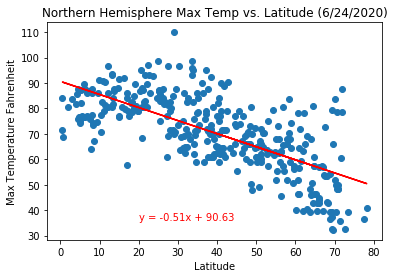

The correlation(r-squared) is: -0.7


In [45]:
# Calculate linear regression
regression_model = st.linregress(northern_df['Lat'], northern_df['Max Temp'])
(slope, intercept, rvalue, pvalue, stderr) = regression_model

# Use the scatterplot and add the slope and intercept y=mx+b
regression_value = slope * northern_df['Lat'] + intercept 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_df['Lat'], northern_df['Max Temp'])
plt.plot(northern_df['Lat'],regression_value,"r-")
plt.annotate(line_eq,(20,36),fontsize=10,color="red")
plt.title('Northern Hemisphere Max Temp vs. Latitude (6/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature Fahrenheit')
plt.show()

correlation = st.pearsonr(northern_df['Lat'], northern_df['Max Temp'])
print(f'The correlation(r-squared) is: {round(correlation[0],2)}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

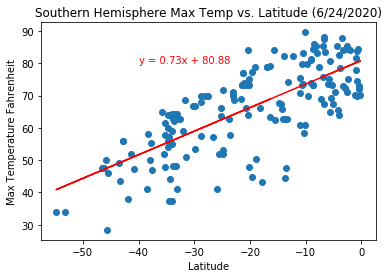

The correlation(r-squared) is: 0.74


In [46]:
# Calculate linear regression
regression_model = st.linregress(southern_df['Lat'], southern_df['Max Temp'])
(slope, intercept, rvalue, pvalue, stderr) = regression_model

# Use the scatterplot and add the slope and intercept y=mx+b
regression_value = slope * southern_df['Lat'] + intercept 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_df['Lat'], southern_df['Max Temp'])
plt.plot(southern_df['Lat'],regression_value,"r-")
plt.annotate(line_eq,(-40, 80),fontsize=10,color="red")
plt.title('Southern Hemisphere Max Temp vs. Latitude (6/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature Fahrenheit')
plt.show()

correlation = st.pearsonr(southern_df['Lat'], southern_df['Max Temp'])
print(f'The correlation(r-squared) is: {round(correlation[0],2)}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

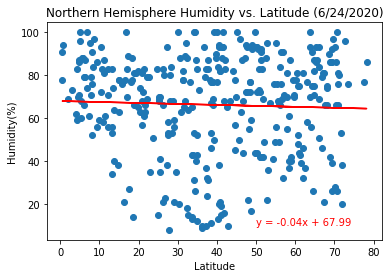

The correlation(r-squared) is: -0.04


In [47]:
# Calculate linear regression
regression_model = st.linregress(northern_df['Lat'], northern_df['Humidity'])
(slope, intercept, rvalue, pvalue, stderr) = regression_model

# Use the scatterplot and add the slope and intercept y=mx+b
regression_value = slope * northern_df['Lat'] + intercept 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_df['Lat'], northern_df['Humidity'])
plt.plot(northern_df['Lat'],regression_value,"r-")
plt.annotate(line_eq,(50,10),fontsize=10,color="red")
plt.title('Northern Hemisphere Humidity vs. Latitude (6/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.show()

correlation = st.pearsonr(northern_df['Lat'], northern_df['Humidity'])
print(f'The correlation(r-squared) is: {round(correlation[0],2)}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

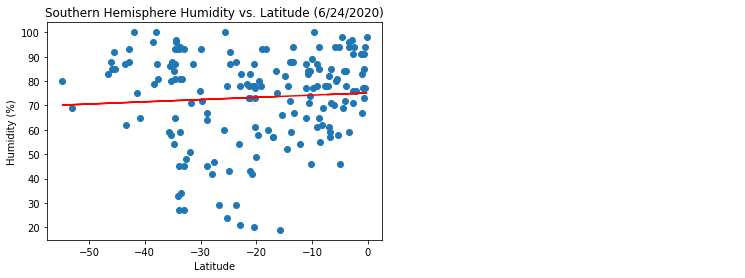

The correlation(r-squared) is: 0.07


In [48]:
# Calculate linear regression
regression_model = st.linregress(southern_df['Lat'], southern_df['Humidity'])
(slope, intercept, rvalue, pvalue, stderr) = regression_model

# Use the scatterplot and add the slope and intercept y=mx+b
regression_value = slope * southern_df['Lat'] + intercept 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_df['Lat'], southern_df['Humidity'])
plt.plot(southern_df['Lat'],regression_value,"r-")
plt.annotate(line_eq,(50,10),fontsize=10,color="red")
plt.title('Southern Hemisphere Humidity vs. Latitude (6/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

correlation = st.pearsonr(southern_df['Lat'], southern_df['Humidity'])
print(f'The correlation(r-squared) is: {round(correlation[0],2)}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

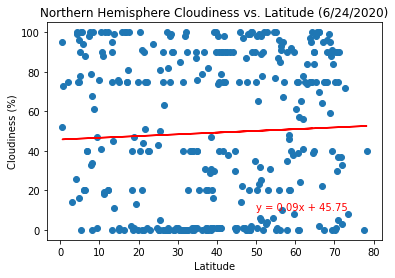

The correlation(r-squared) is: 0.05


In [49]:
# Calculate linear regression
regression_model = st.linregress(northern_df['Lat'], northern_df['Cloudiness'])
(slope, intercept, rvalue, pvalue, stderr) = regression_model

# Use the scatterplot and add the slope and intercept y=mx+b
regression_value = slope * northern_df['Lat'] + intercept 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_df['Lat'], northern_df['Cloudiness'])
plt.plot(northern_df['Lat'],regression_value,"r-")
plt.annotate(line_eq,(50,10),fontsize=10,color="red")
plt.title('Northern Hemisphere Cloudiness vs. Latitude (6/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

correlation = st.pearsonr(northern_df['Lat'], northern_df['Cloudiness'])
print(f'The correlation(r-squared) is: {round(correlation[0],2)}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

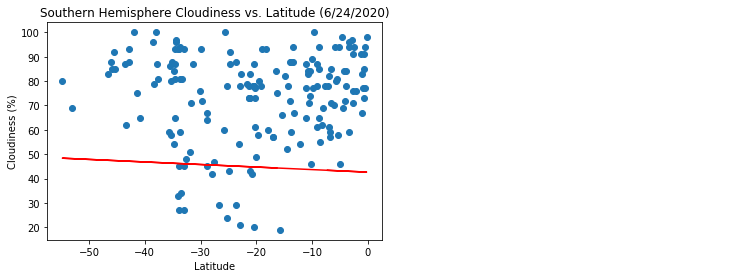

The correlation(r-squared) is: -0.04


In [50]:
# Calculate linear regression
regression_model = st.linregress(southern_df['Lat'], southern_df['Cloudiness'])
(slope, intercept, rvalue, pvalue, stderr) = regression_model

# Use the scatterplot and add the slope and intercept y=mx+b
regression_value = slope * southern_df['Lat'] + intercept 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_df['Lat'], southern_df['Humidity'])
plt.plot(southern_df['Lat'],regression_value,"r-")
plt.annotate(line_eq,(50,10),fontsize=10,color="red")
plt.title('Southern Hemisphere Cloudiness vs. Latitude (6/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

correlation = st.pearsonr(southern_df['Lat'], southern_df['Cloudiness'])
print(f'The correlation(r-squared) is: {round(correlation[0],2)}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

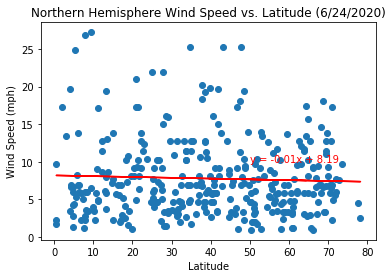

The correlation(r-squared) is: -0.04


In [51]:
# Calculate linear regression
regression_model = st.linregress(northern_df['Lat'], northern_df['Wind Speed'])
(slope, intercept, rvalue, pvalue, stderr) = regression_model

# Use the scatterplot and add the slope and intercept y=mx+b
regression_value = slope * northern_df['Lat'] + intercept 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_df['Lat'], northern_df['Wind Speed'])
plt.plot(northern_df['Lat'],regression_value,"r-")
plt.annotate(line_eq,(50,10),fontsize=10,color="red")
plt.title('Northern Hemisphere Wind Speed vs. Latitude (6/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

correlation = st.pearsonr(northern_df['Lat'], northern_df['Wind Speed'])
print(f'The correlation(r-squared) is: {round(correlation[0],2)}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

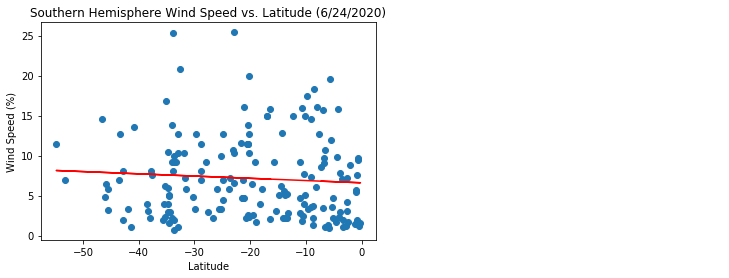

The correlation(r-squared) is: -0.07


In [52]:
# Calculate linear regression
regression_model = st.linregress(southern_df['Lat'], southern_df['Wind Speed'])
(slope, intercept, rvalue, pvalue, stderr) = regression_model

# Use the scatterplot and add the slope and intercept y=mx+b
regression_value = slope * southern_df['Lat'] + intercept 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_df['Lat'], southern_df['Wind Speed'])
plt.plot(southern_df['Lat'],regression_value,"r-")
plt.annotate(line_eq,(50,10),fontsize=10,color="red")
plt.title('Southern Hemisphere Wind Speed vs. Latitude (6/24/2020)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.show()

correlation = st.pearsonr(southern_df['Lat'], southern_df['Wind Speed'])
print(f'The correlation(r-squared) is: {round(correlation[0],2)}')